<a href="https://colab.research.google.com/github/simionattovini/thermal-machines/blob/main/Test%20Solutions/MT_P3_2s2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máquinas Térmicas - P3 - 2s2024

## Enunciado

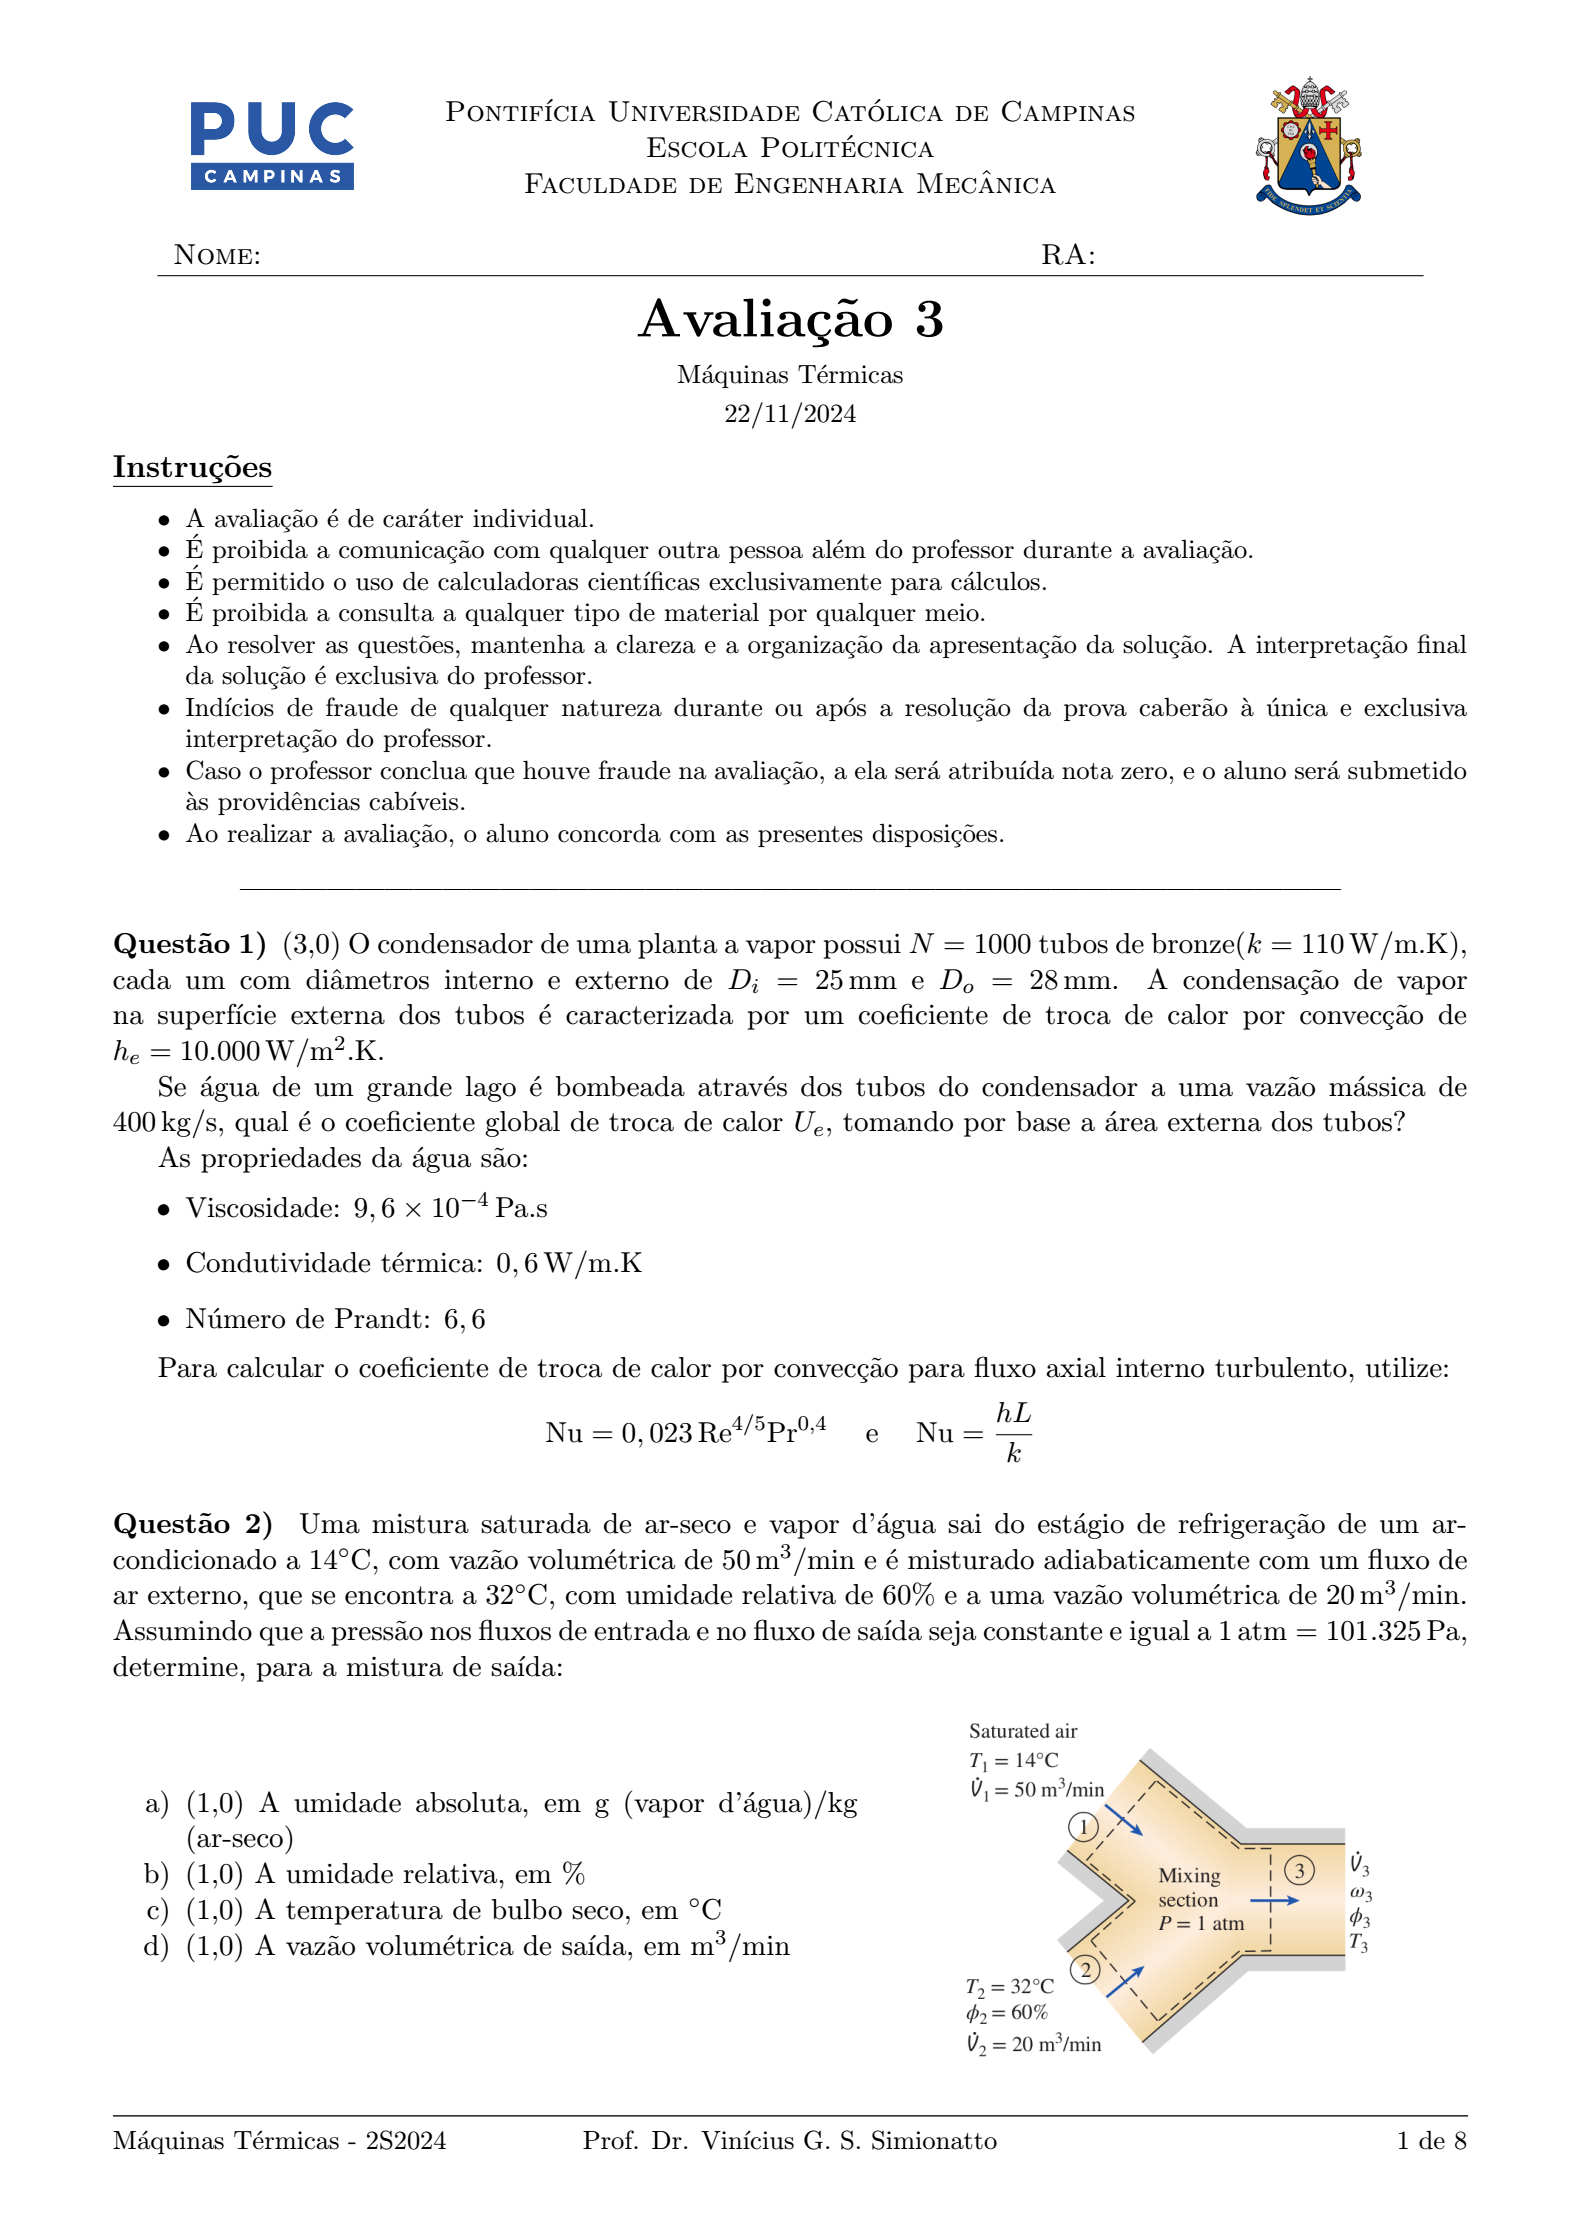

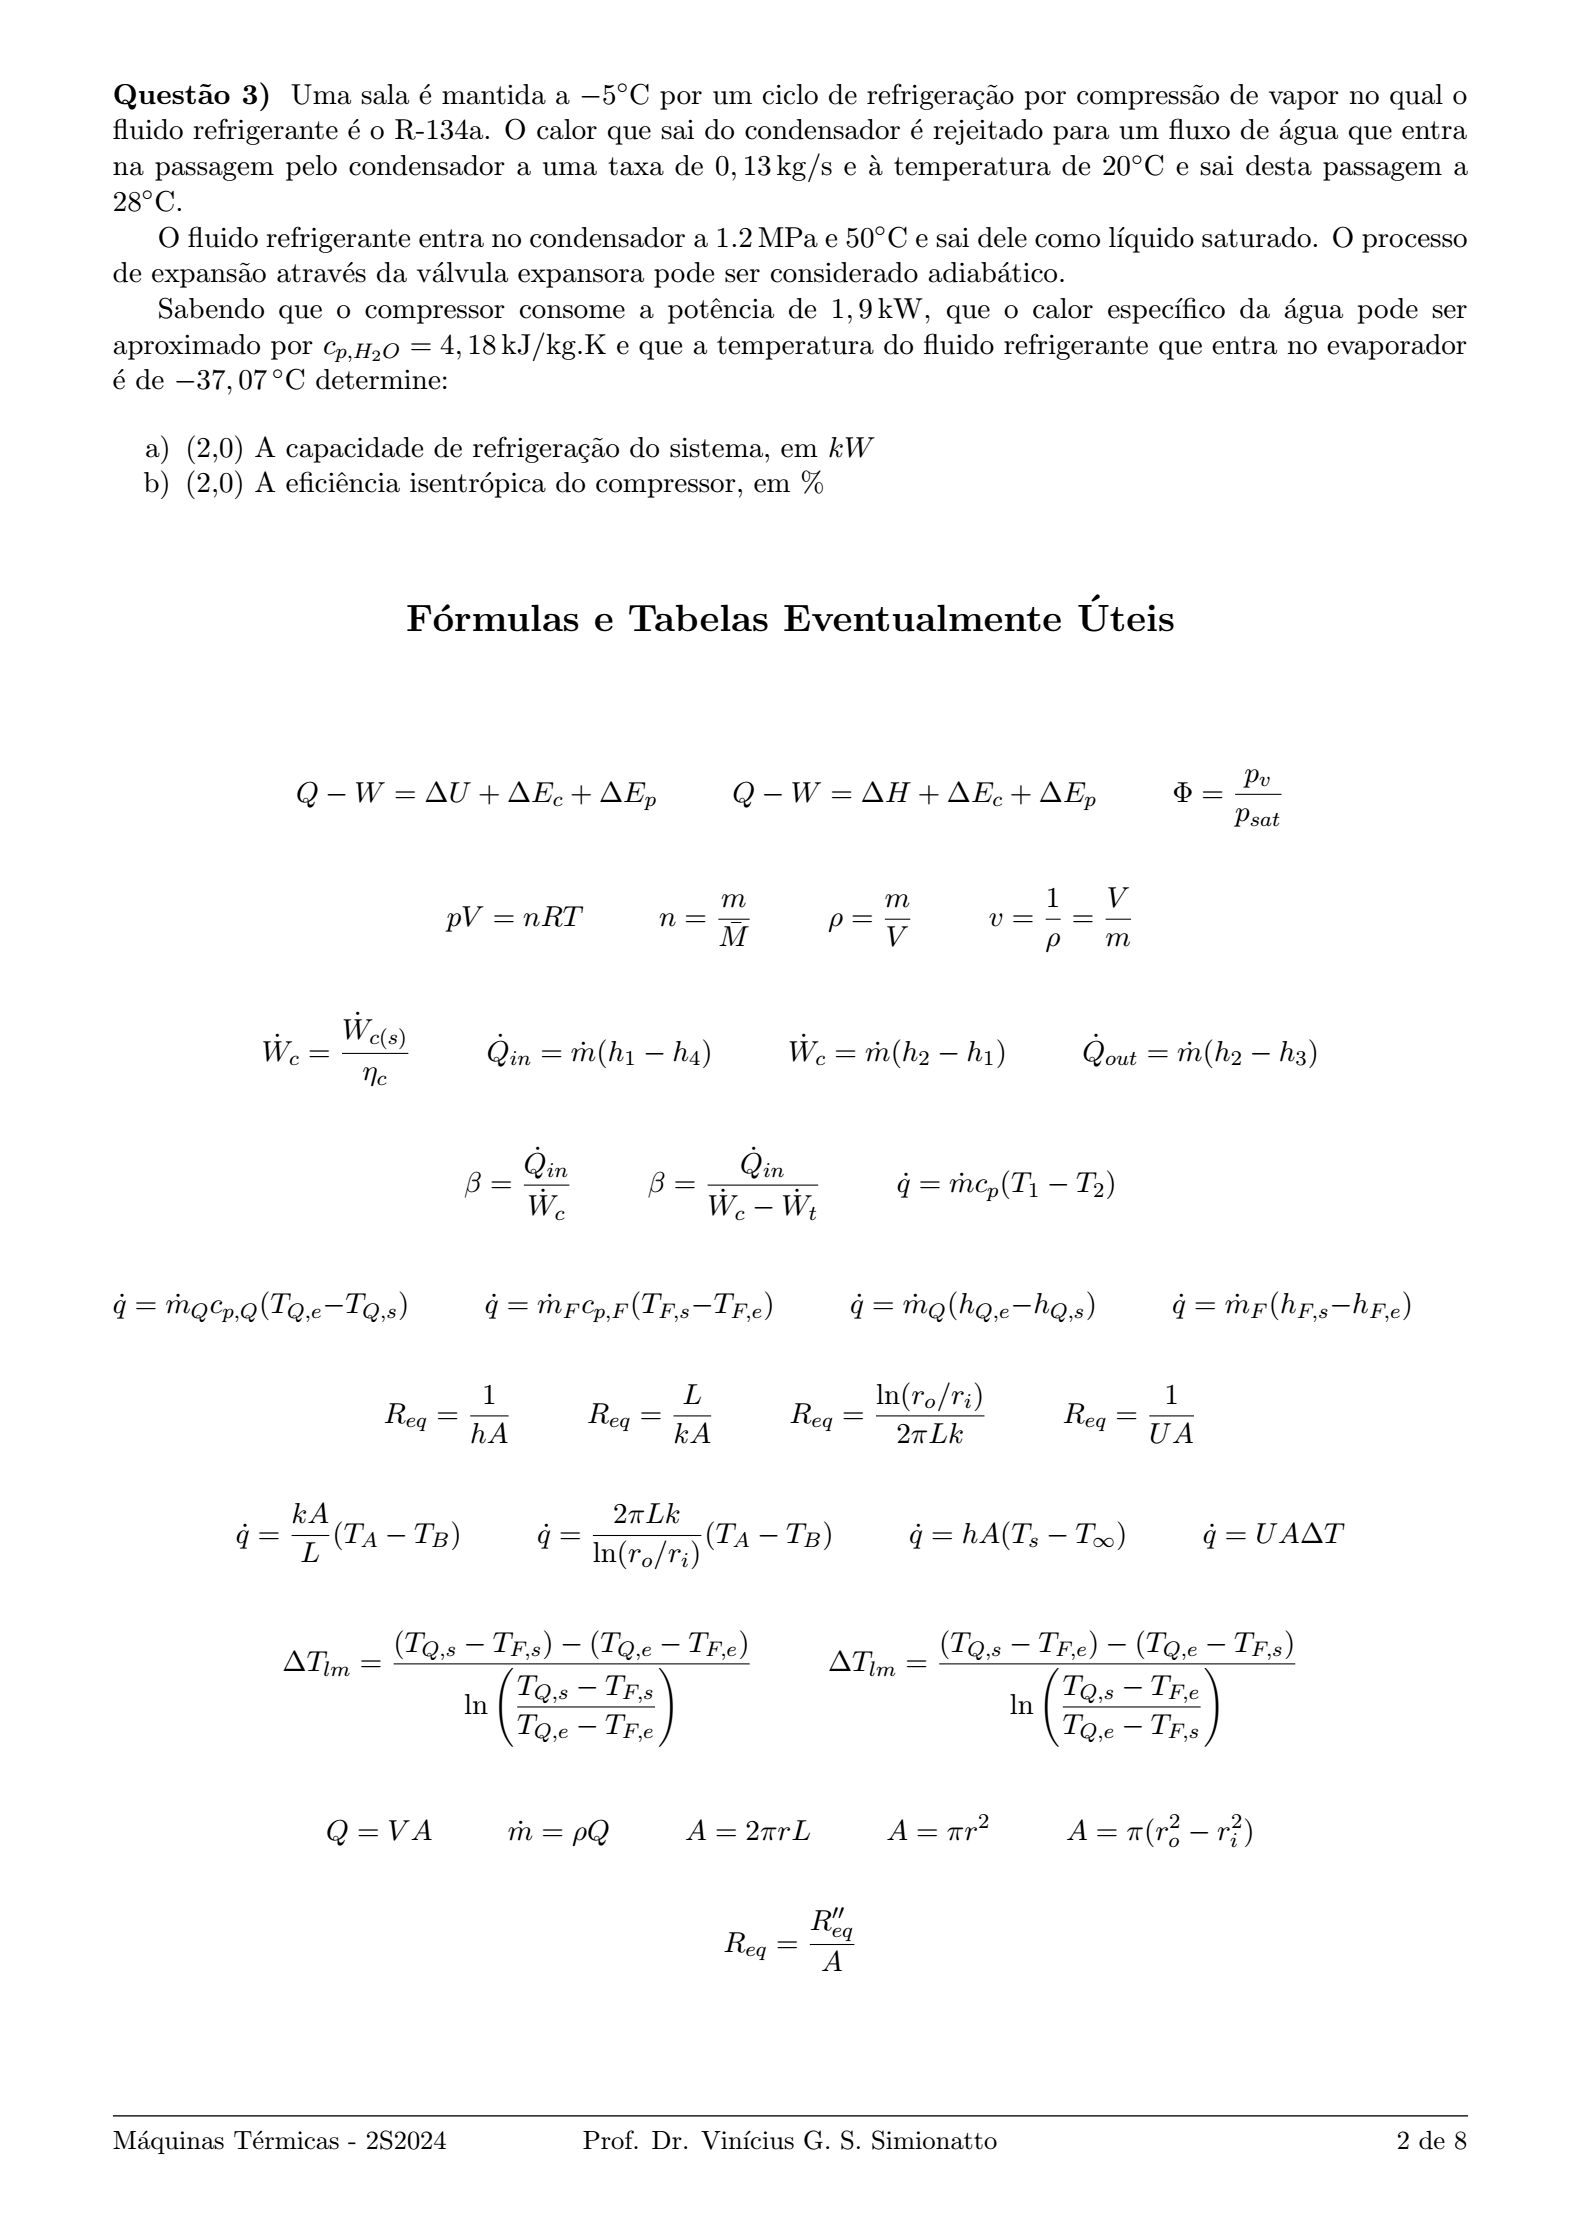

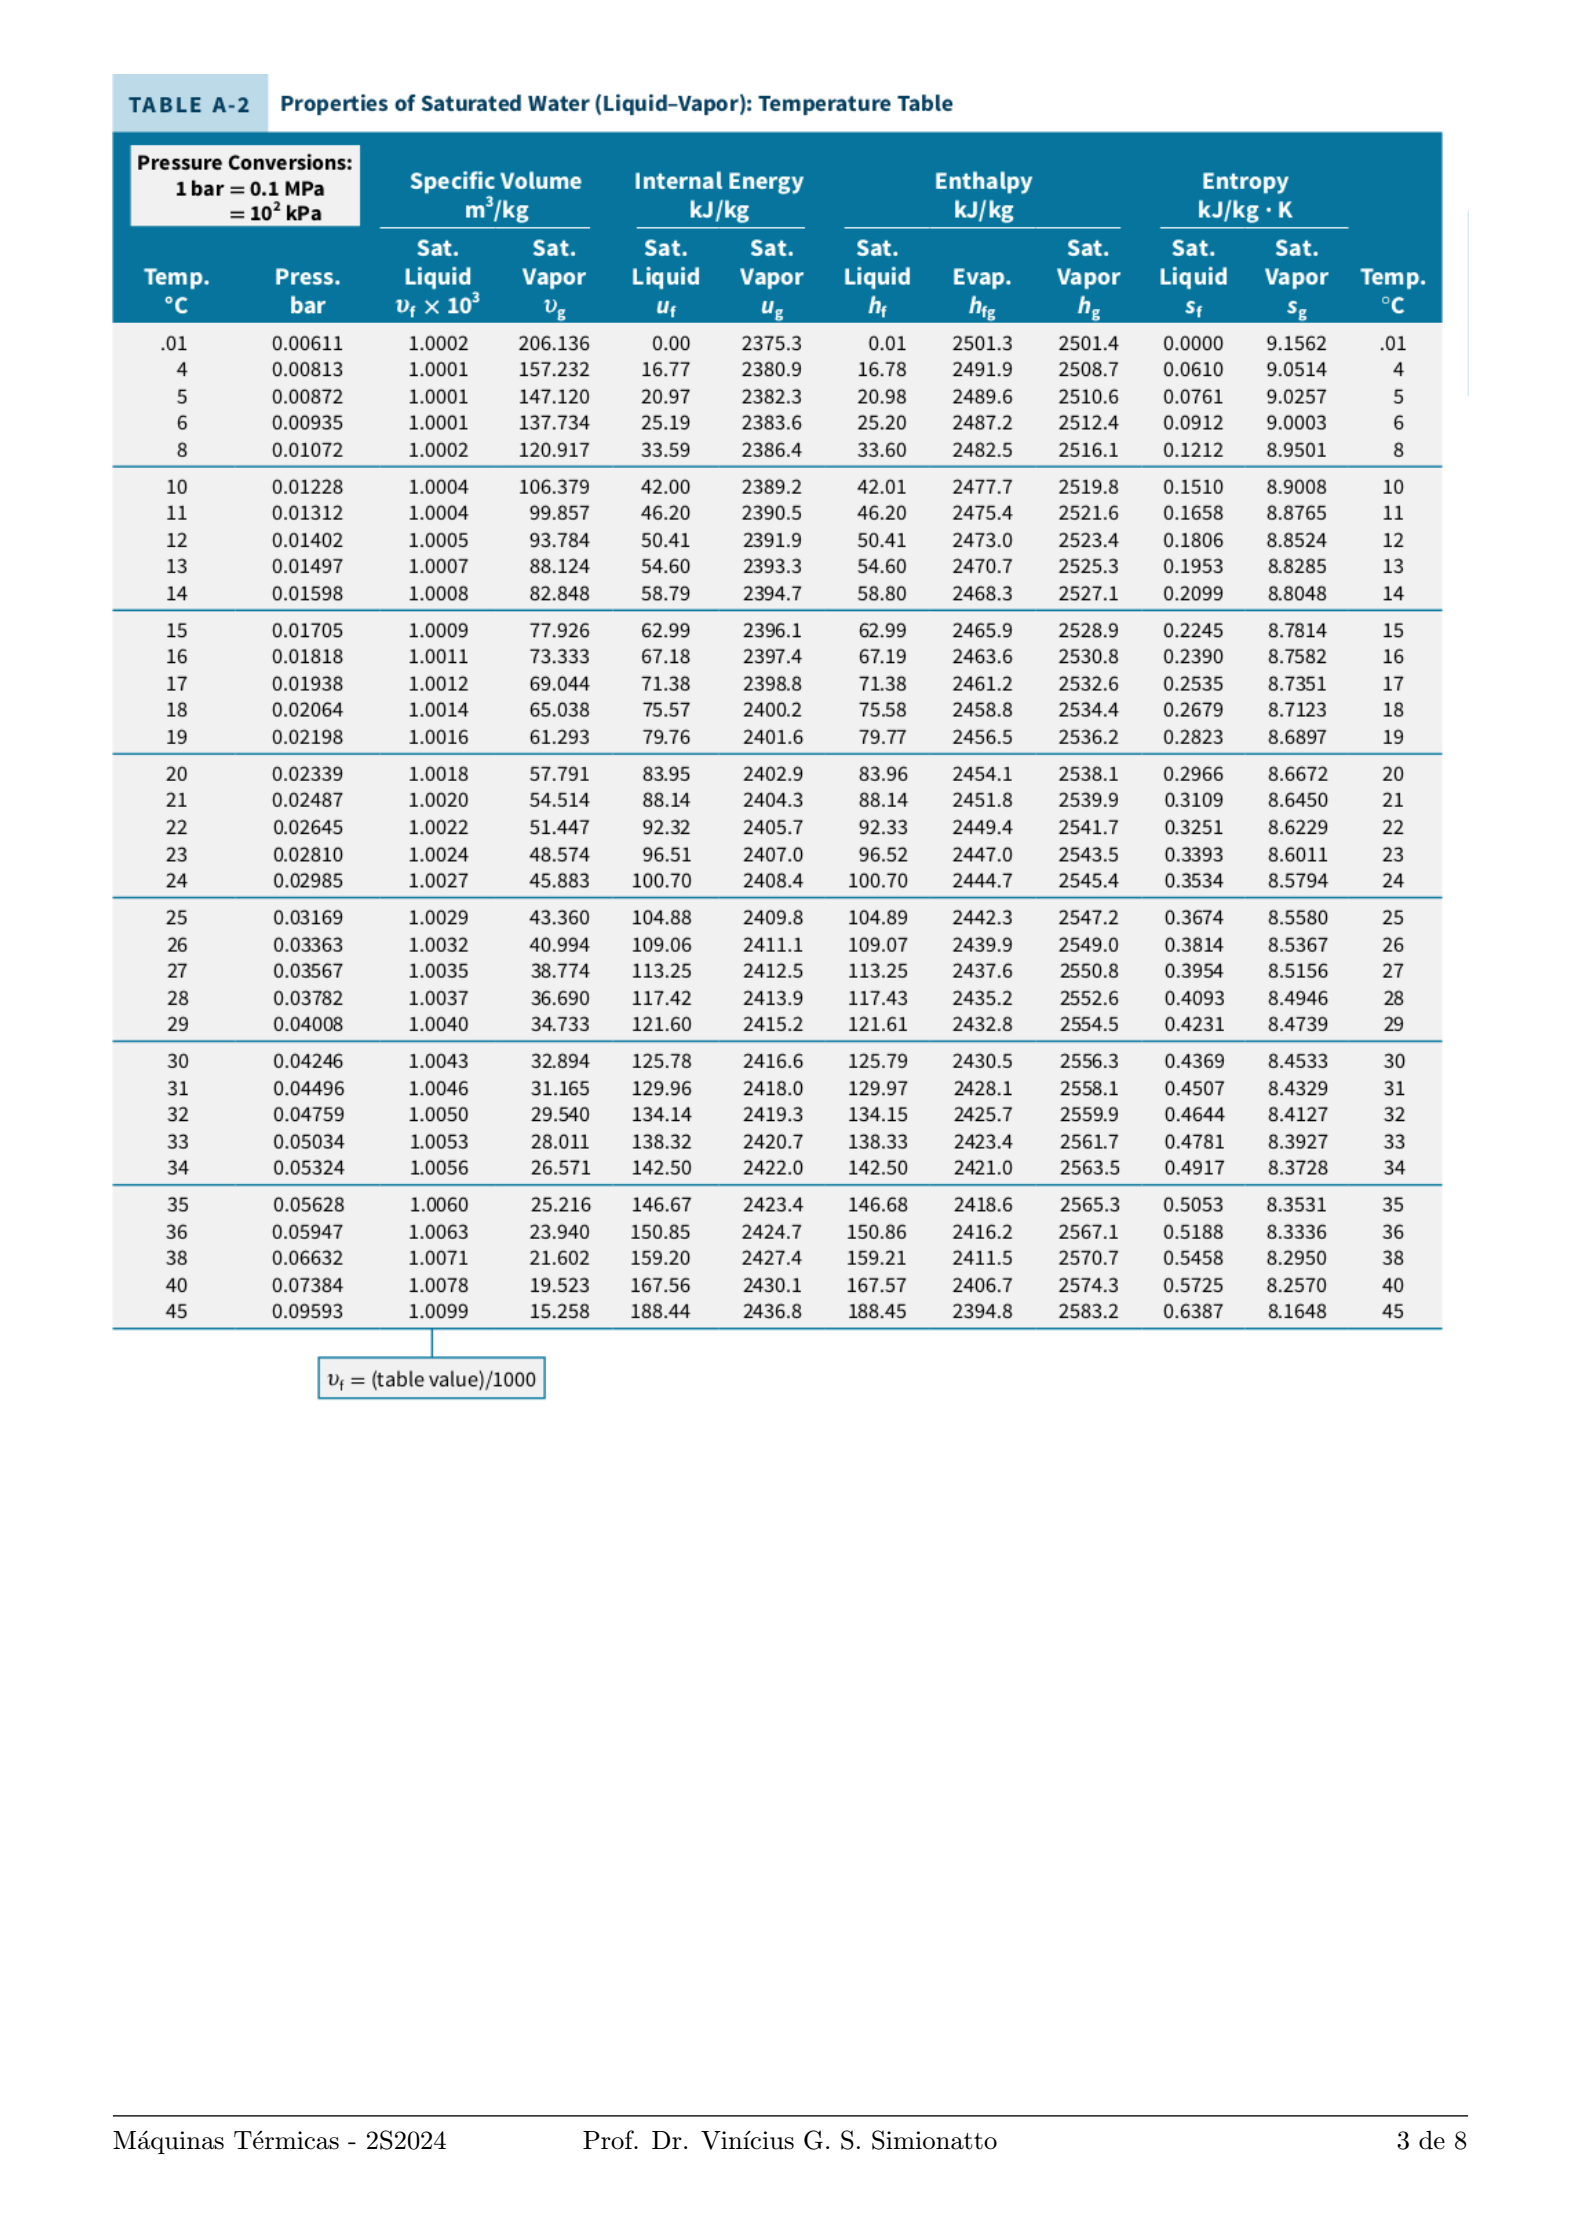

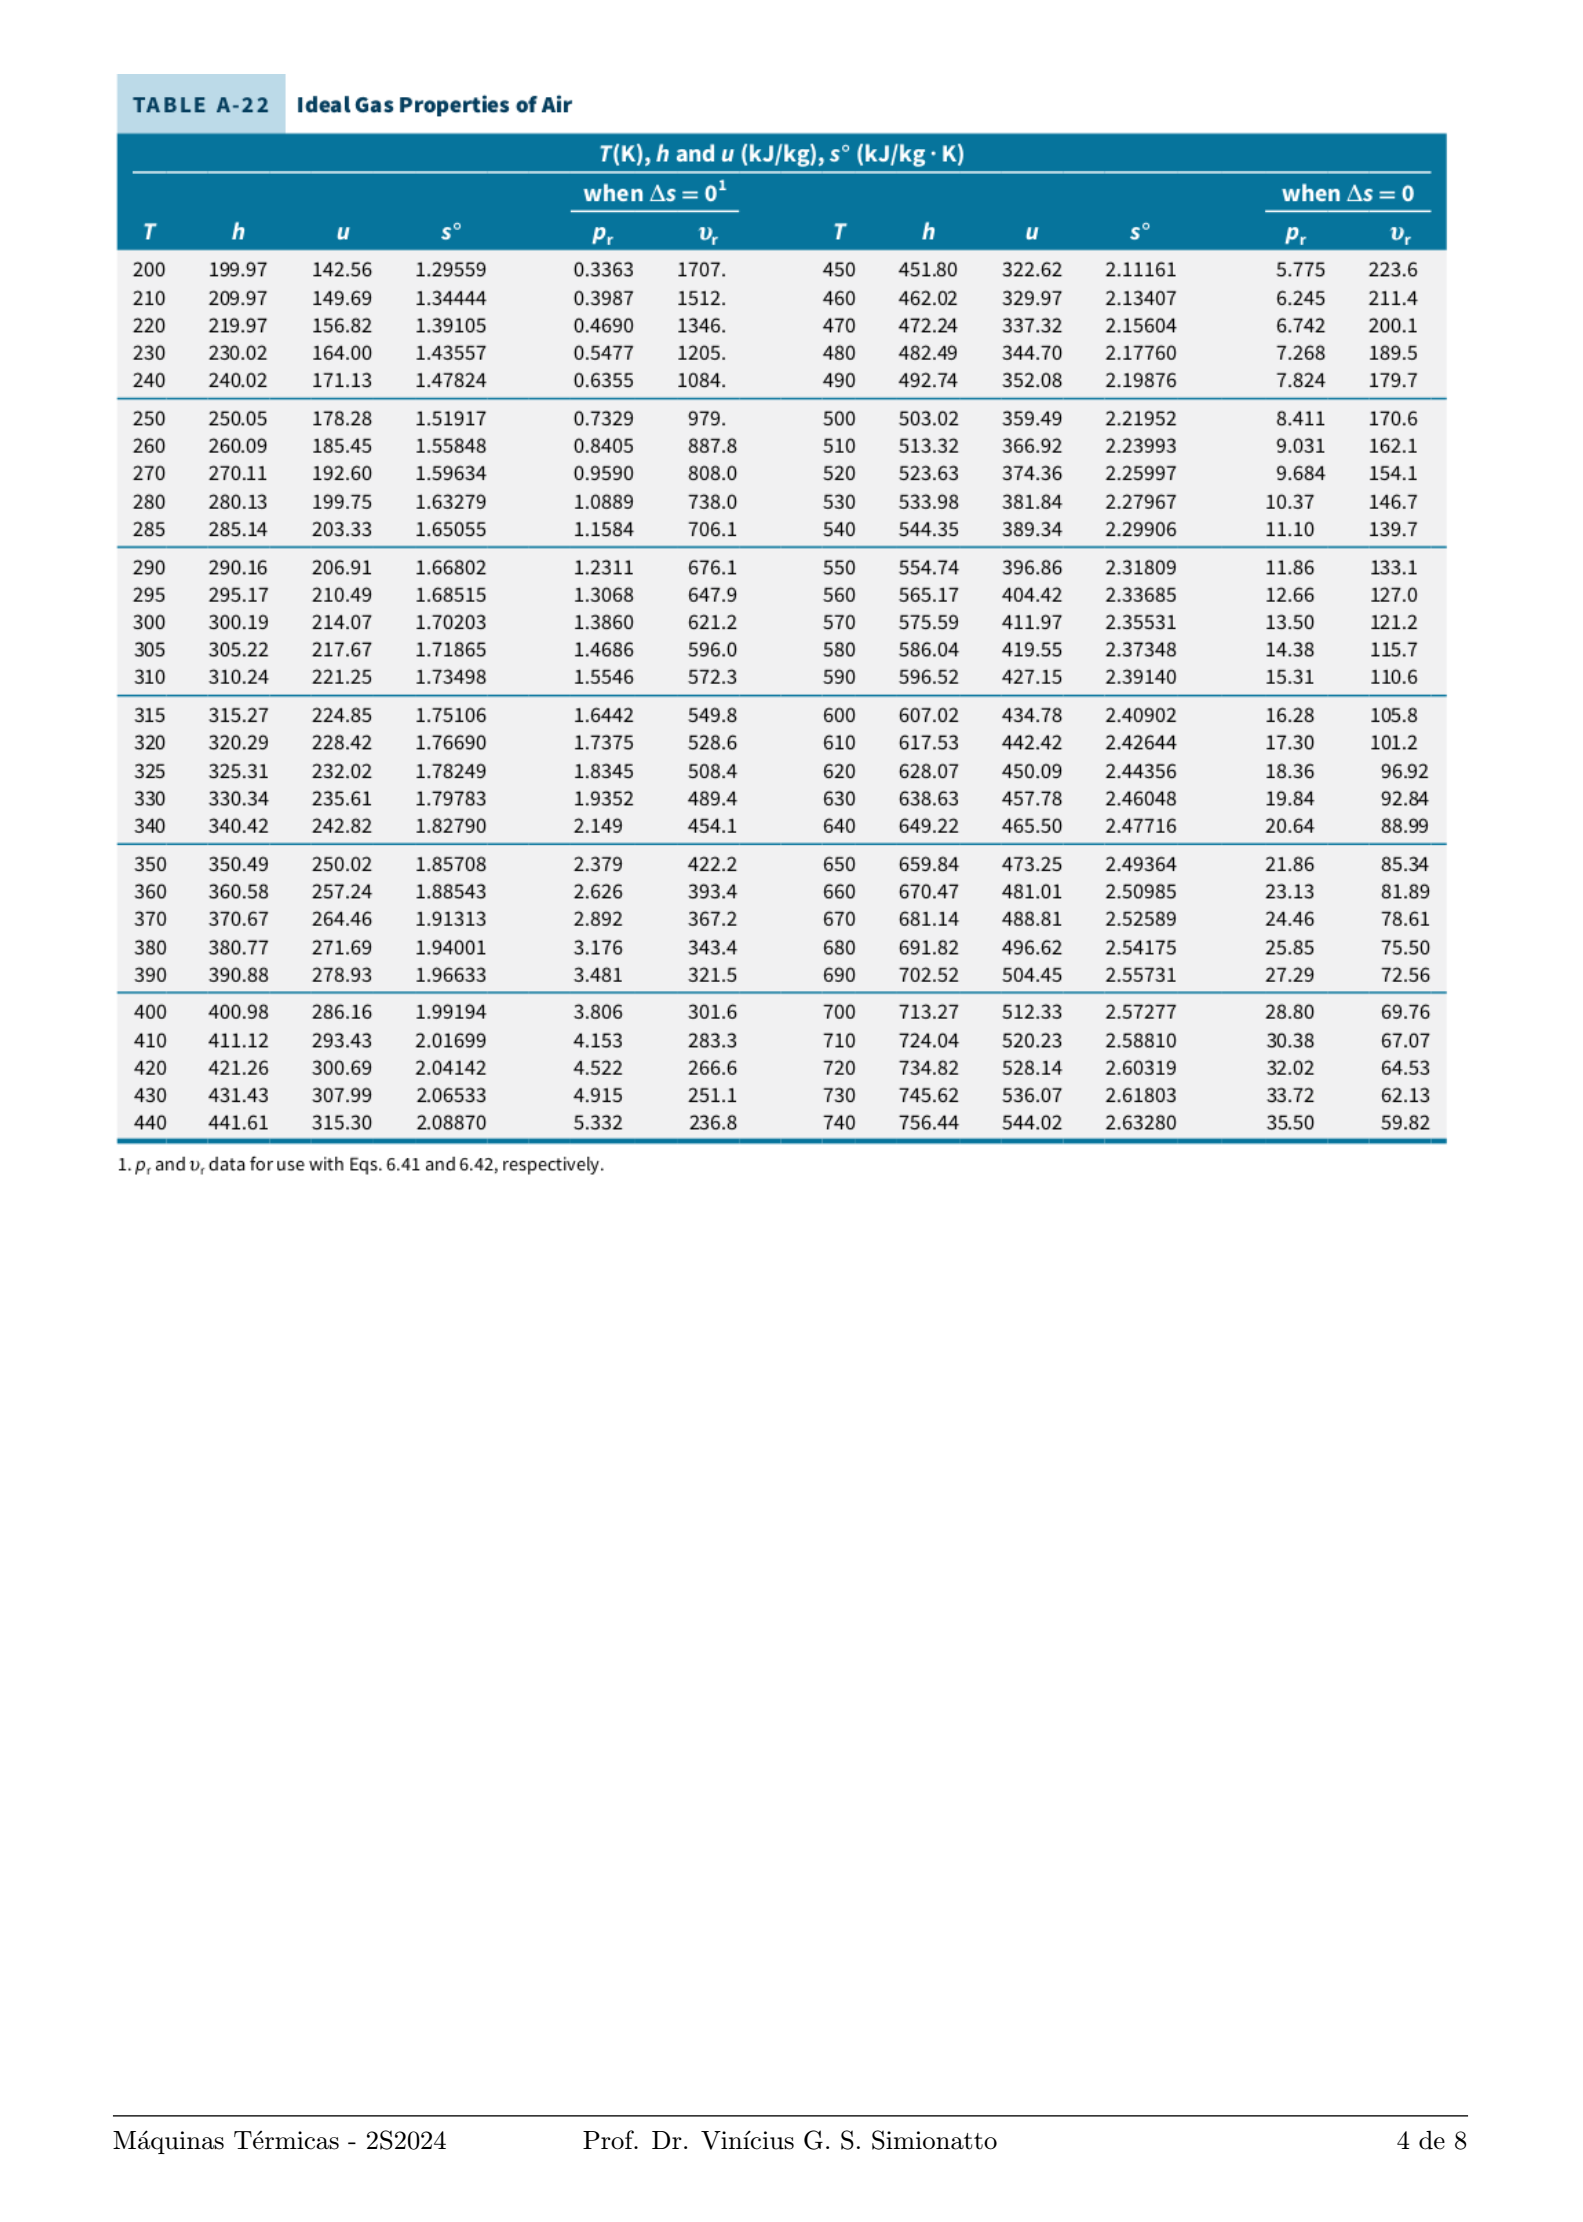

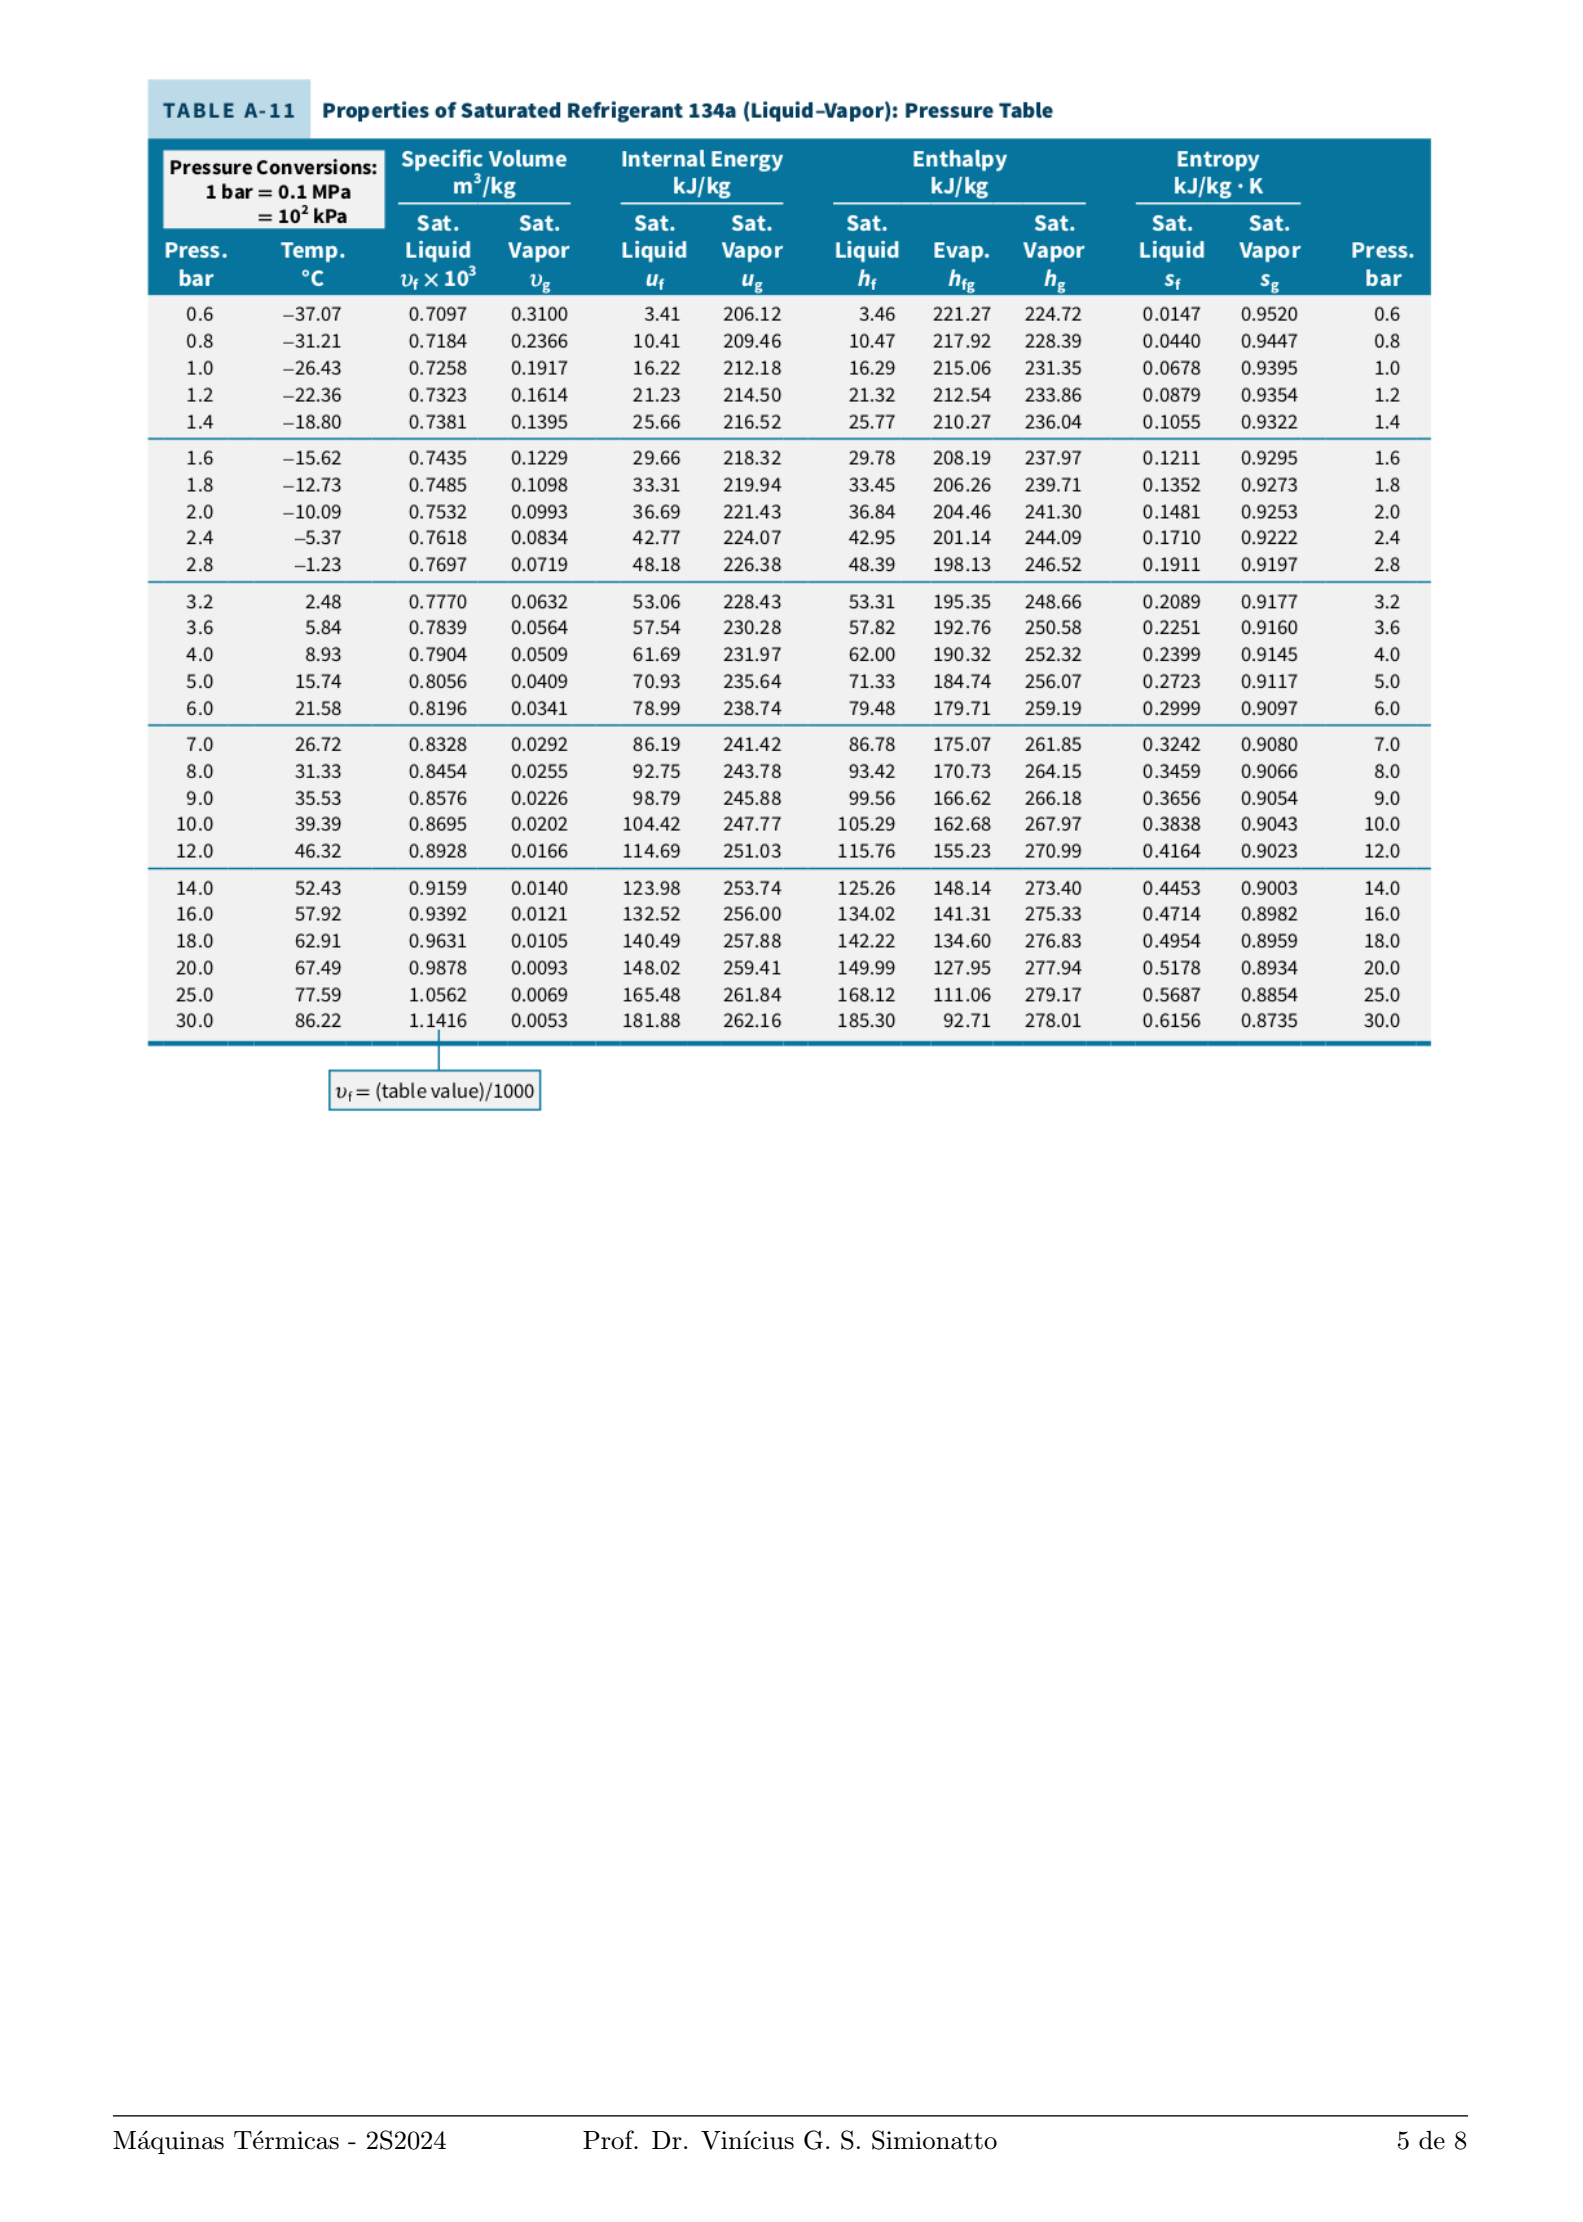

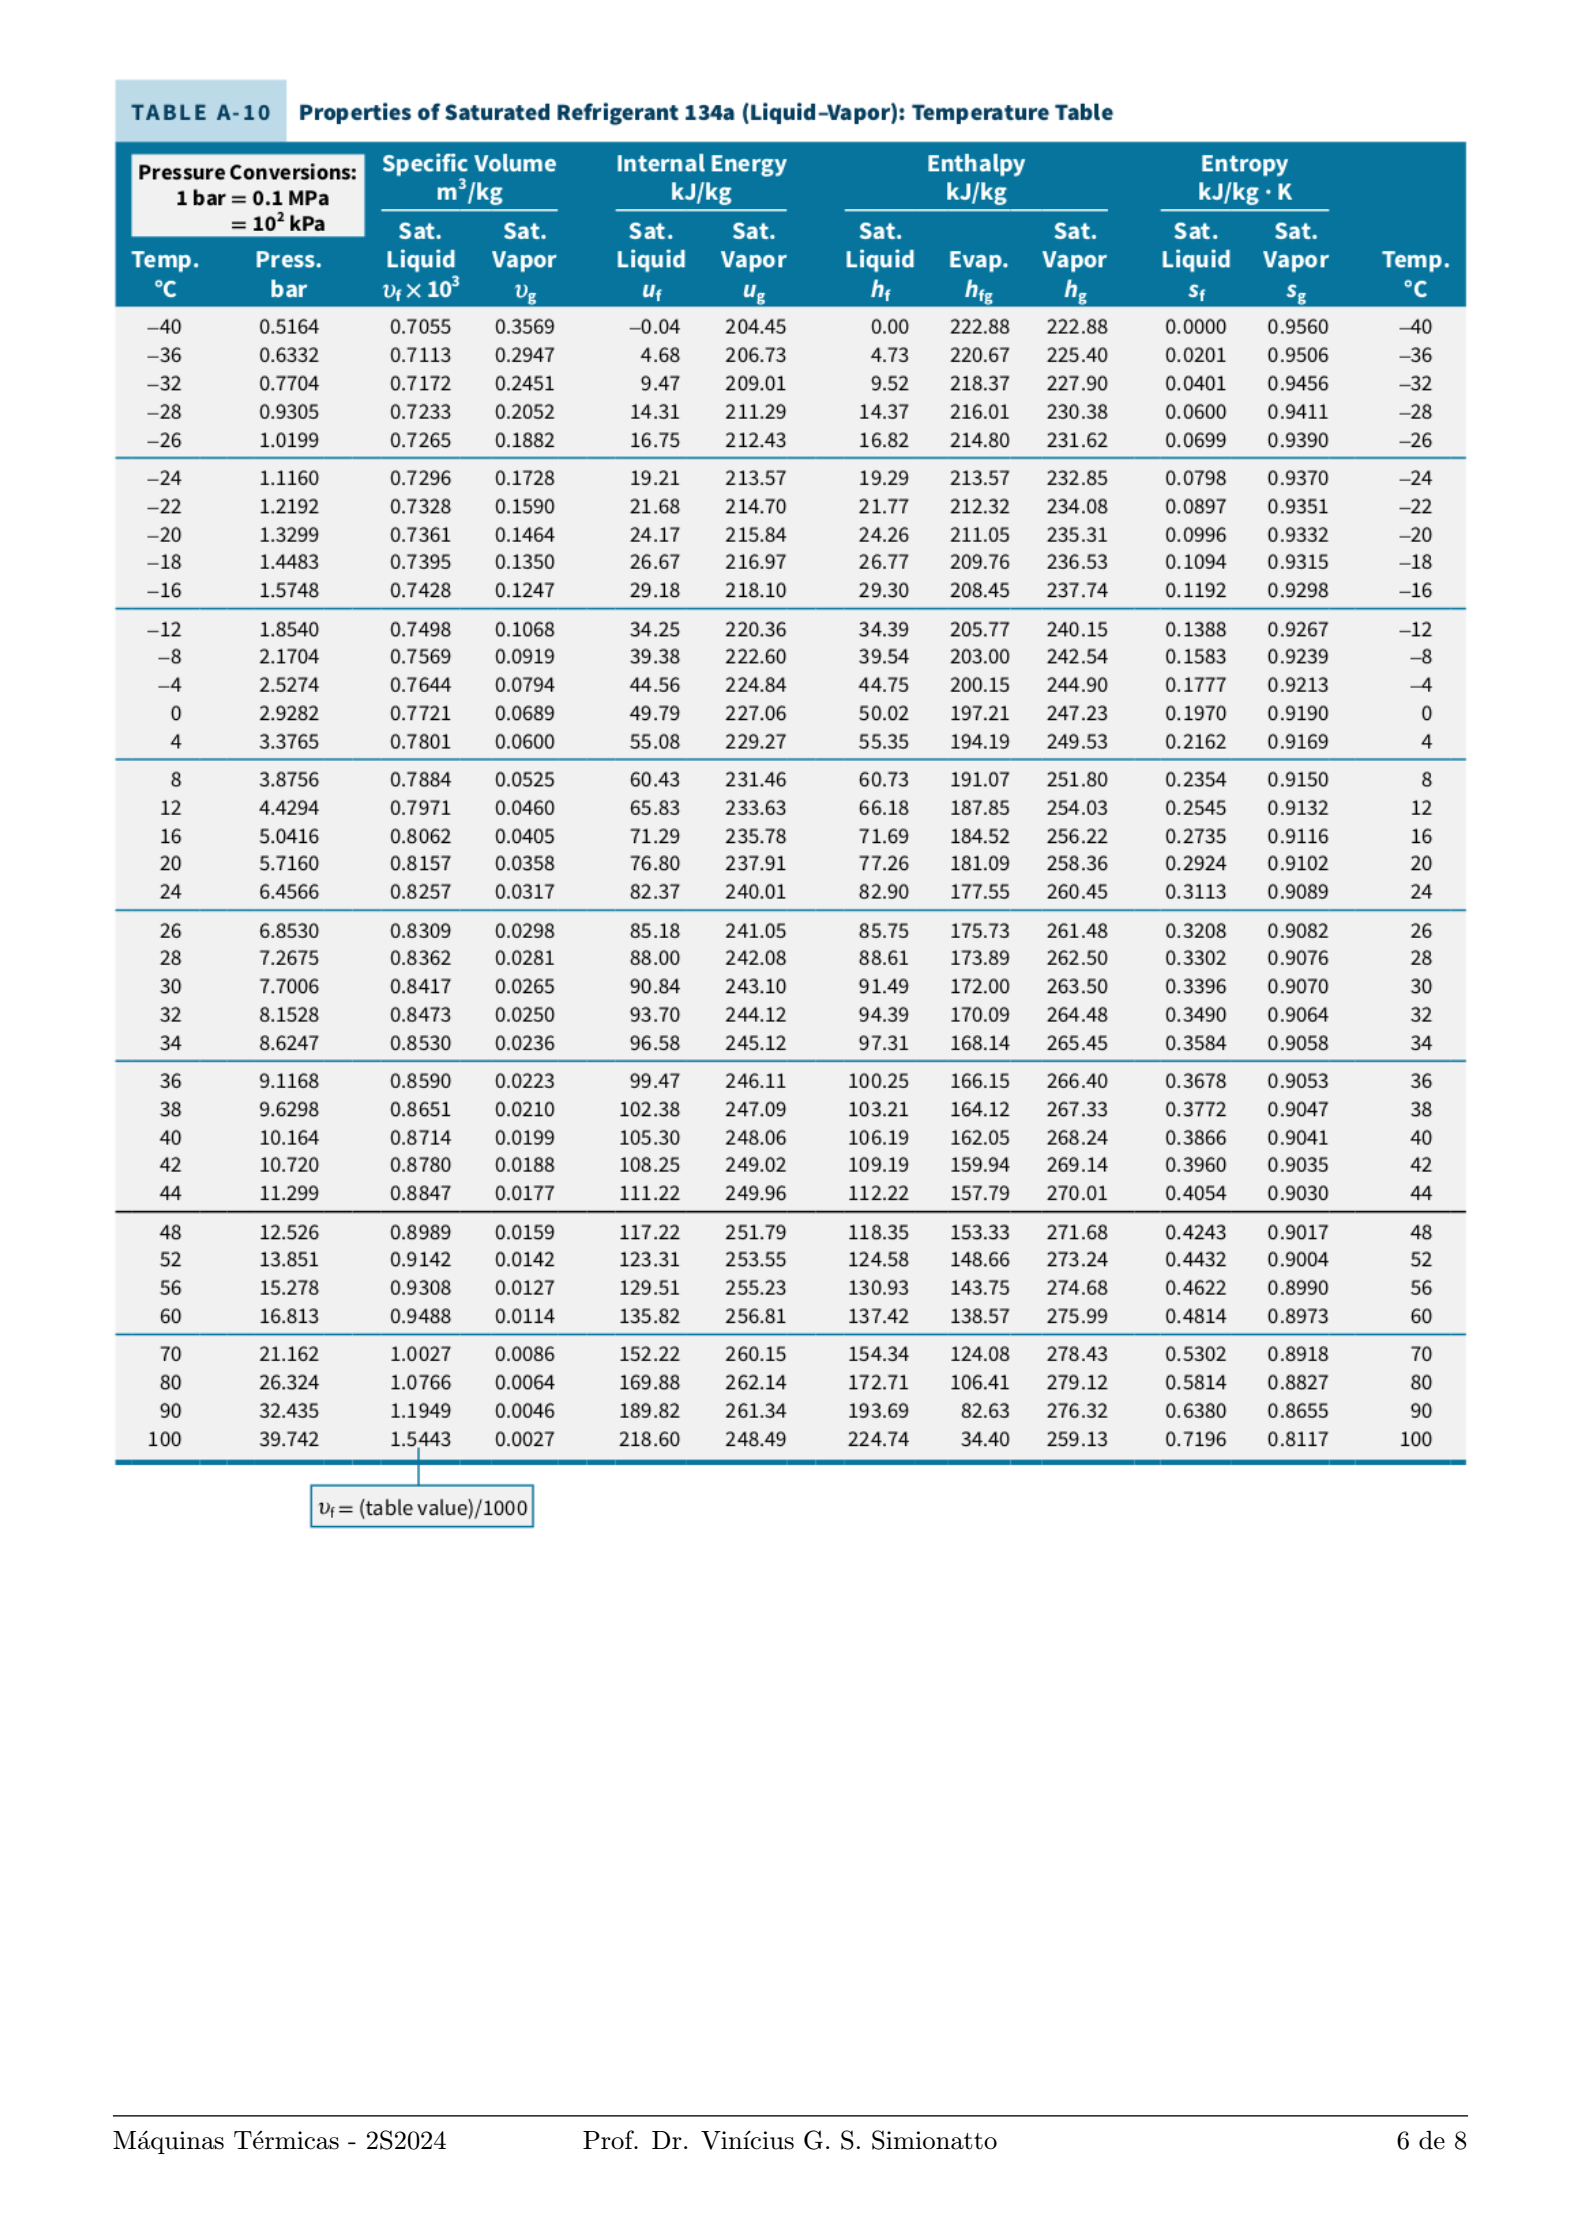

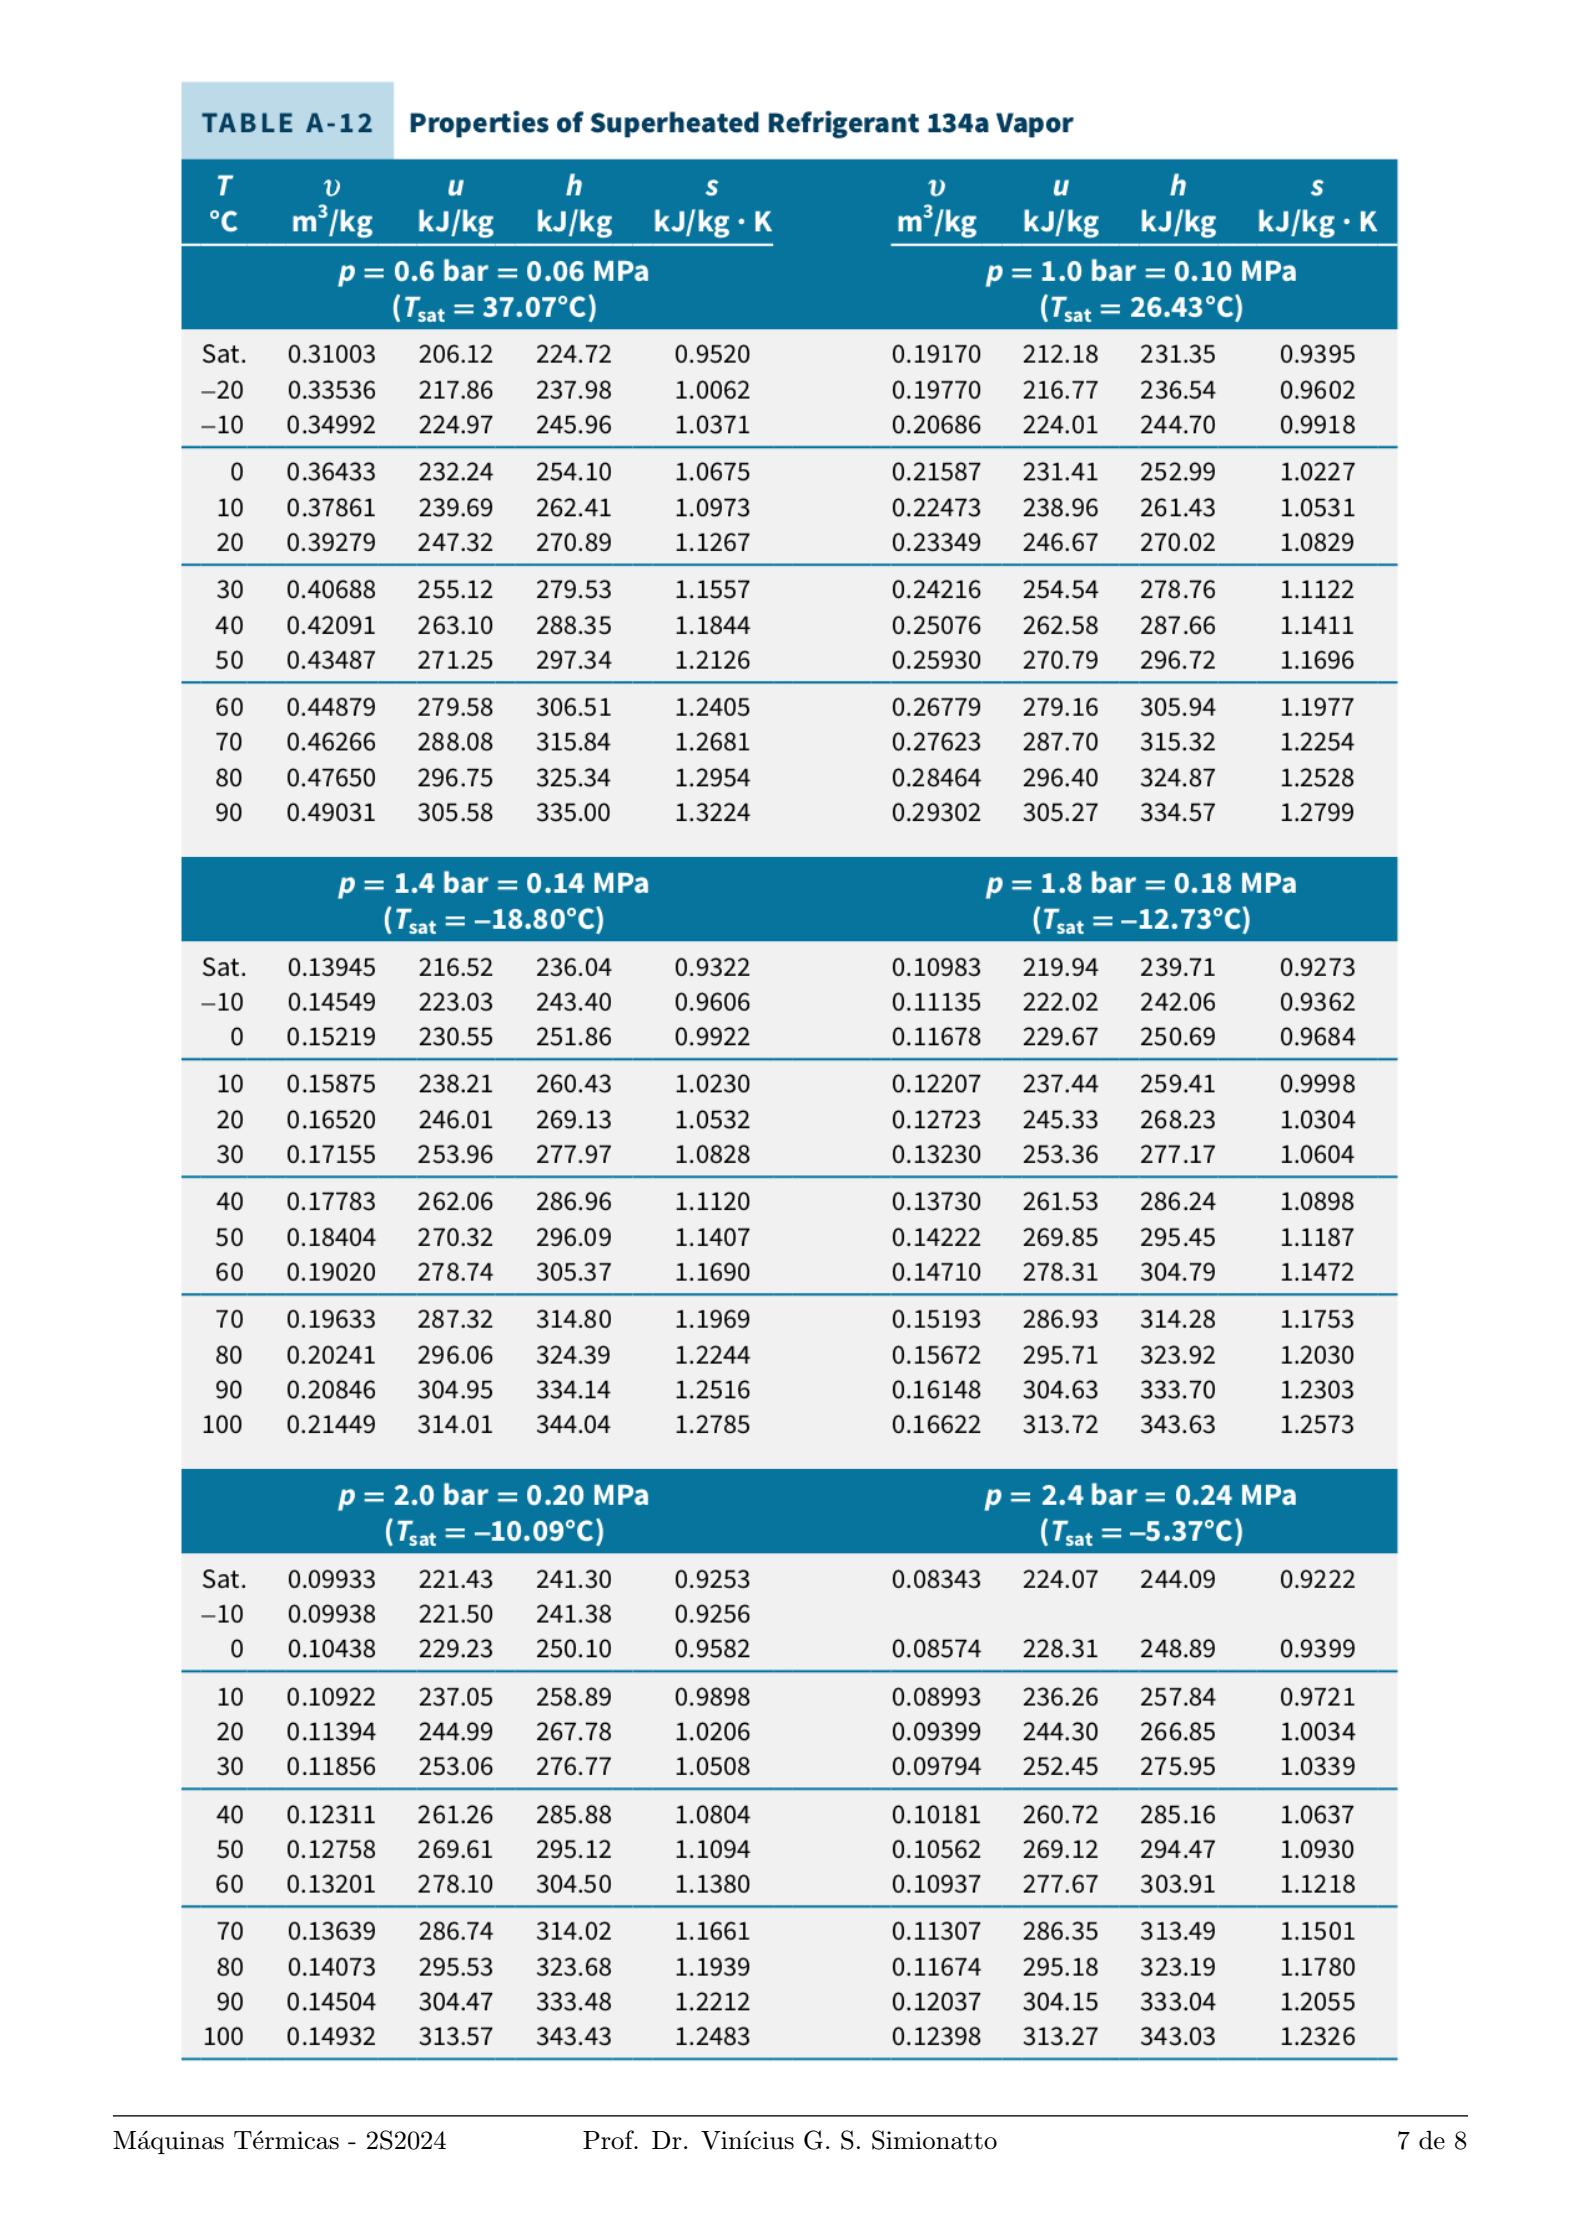

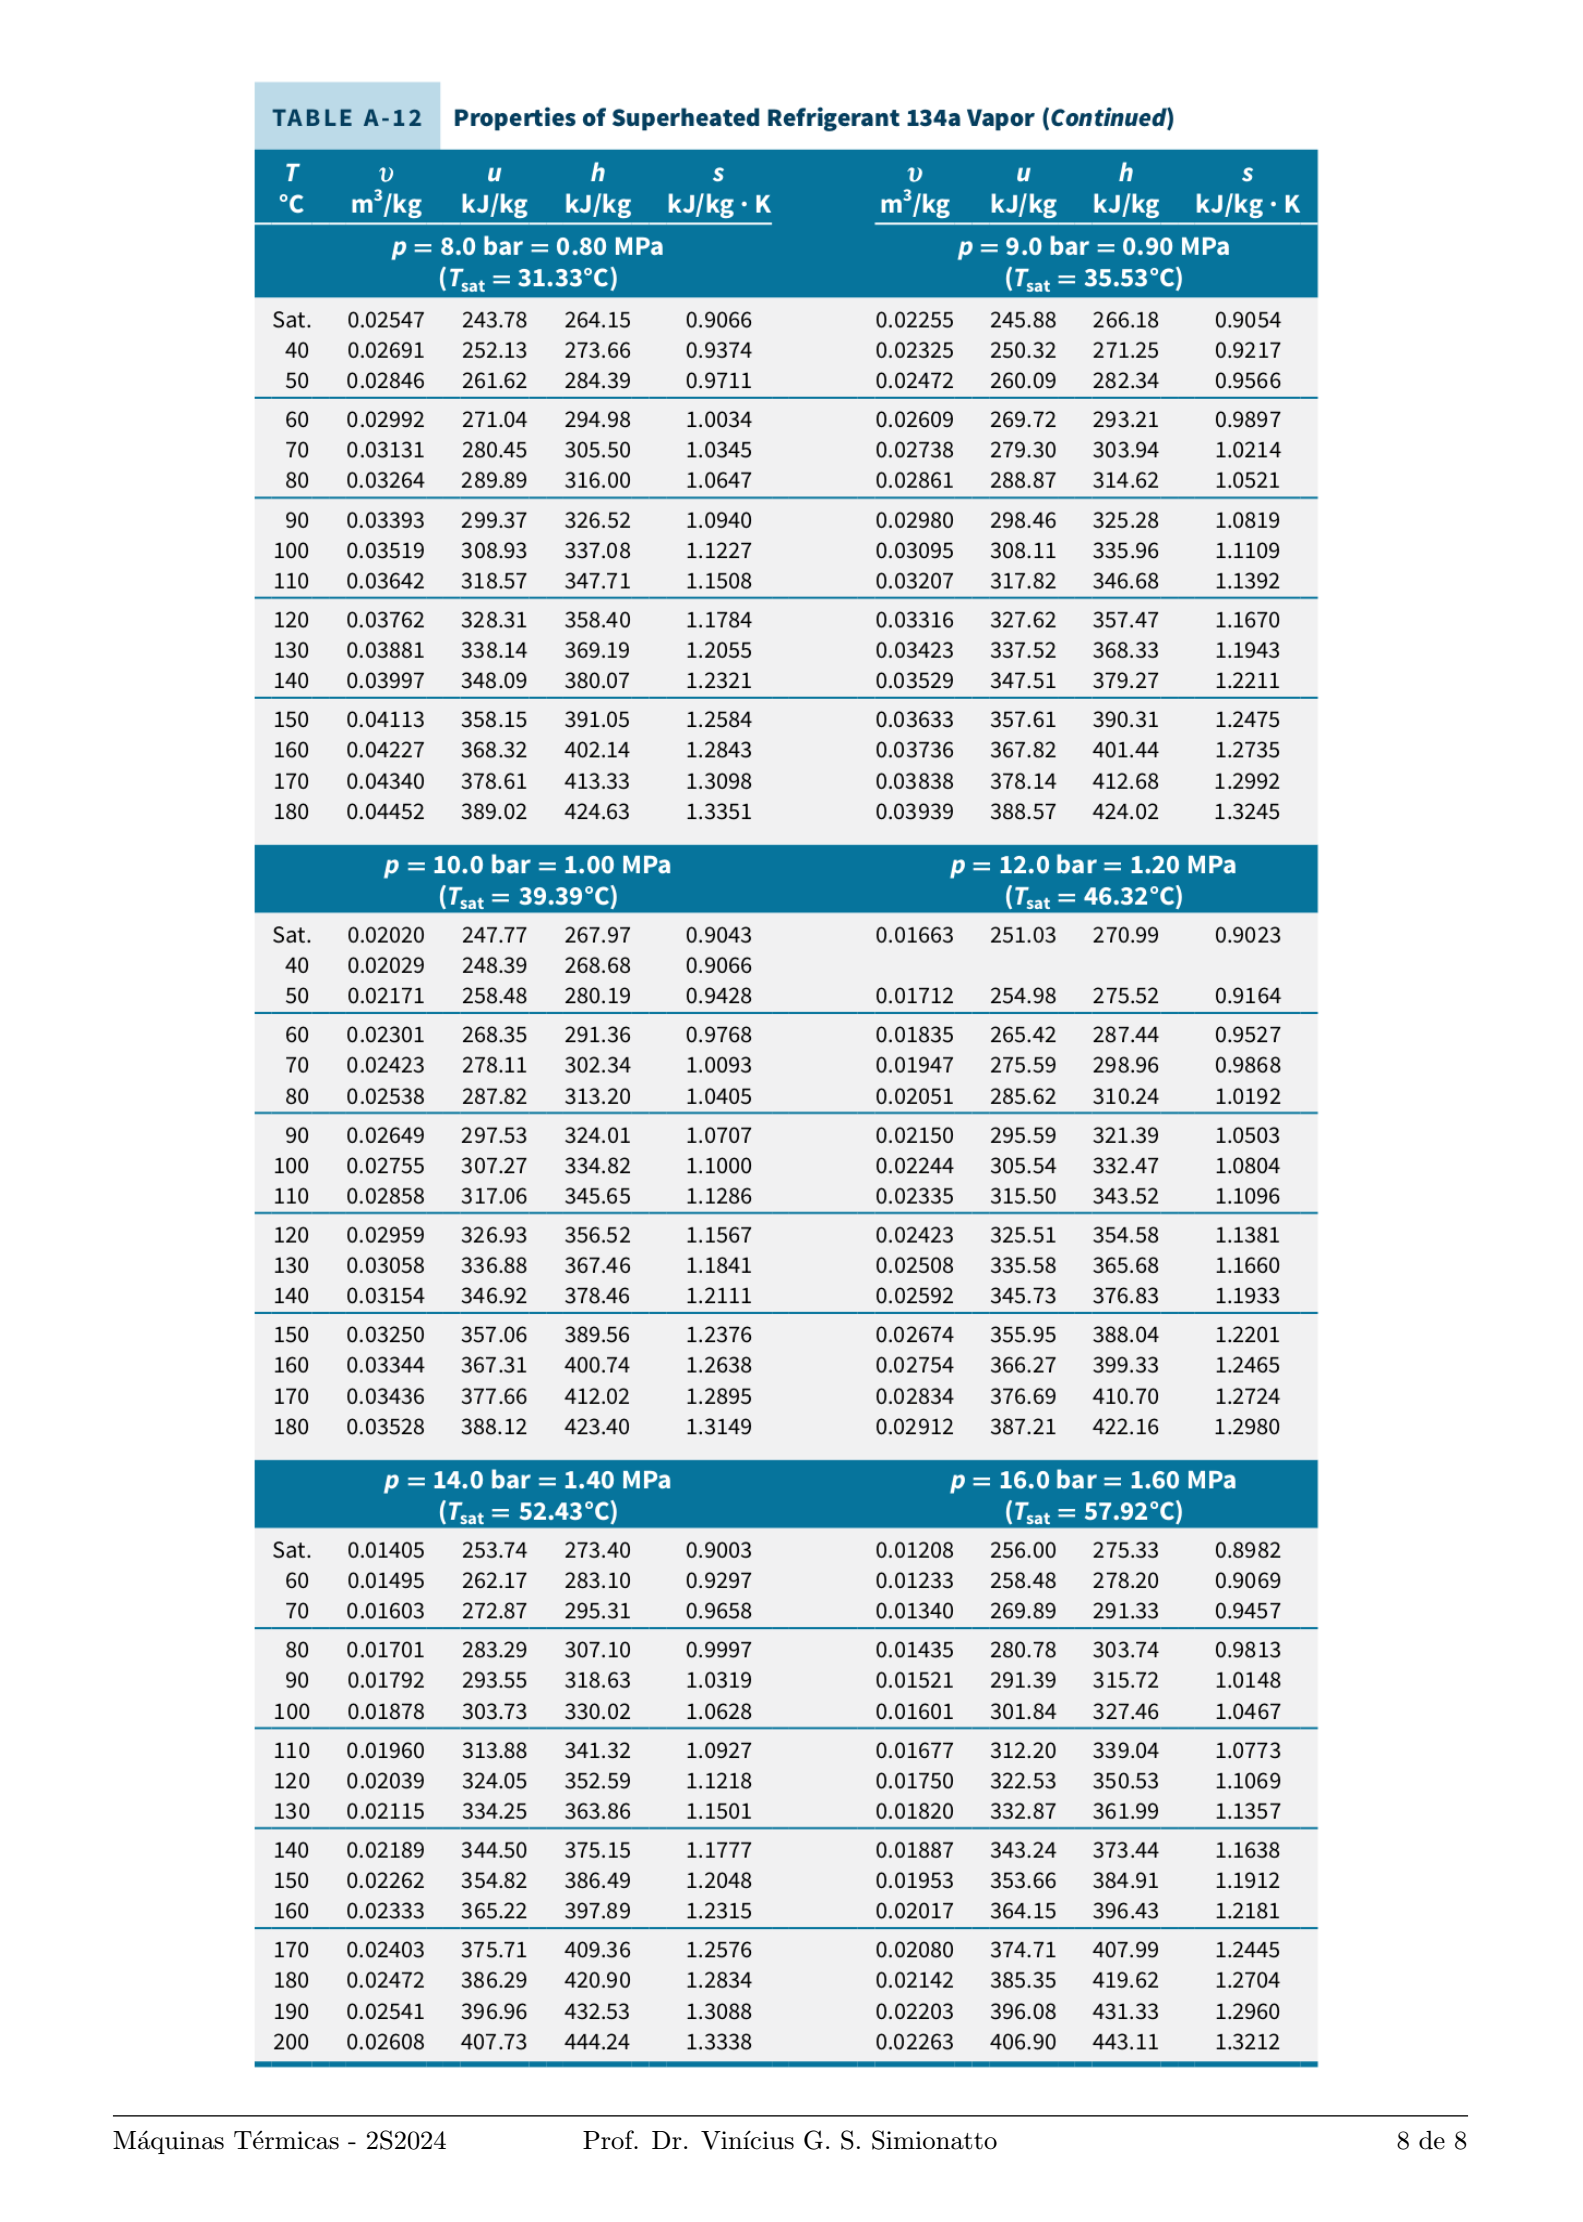

## Resolução

### Questão 1)

Pela teoria de resistências térmicas, para esta questão, se pode escrever:

$$
\frac{1}{U_e A_e} = \frac{1}{h_i A_i} + \frac{\ln(r_o/r_i)}{2\pi L k} + \frac{1}{h_e A_e}
$$

Para utilizar esta equação, todos os dados geométricos são fornecidos, bem como $h_e$ e $k$. São desconhecidos o coeficiente $U_e$, desejado, e o coeficiente de troca de calor por convecção $h_i$.

Segundo o enunciado, deve-se obter os números de Reynolds e Prandtl, depois Nusselt e por fim $h_i$. Assim:

$$
Re = \frac{\rho V D}{\mu} = 21.220,6
$$

O número de Prandtl é dado e igual a 6,6. Assim, o número de Nusselt é calculado por:

$$
Nu = 0,023 Re^{4/5} Pr^{0,4} = 141,56
$$

E o coeficiente global de troca de calor é calculado por:

$$
h_i = \frac{Nu \cdot k}{L} = \frac{Nu \cdot k}{D_i} = 3.397,53\,\mathrm{W/m^2.K}
$$

In [1]:
from numpy import pi

rho = 998.37  # kg/m³
Di = 0.025   # m
De = 0.028   # m
dm = 400      # kg/s

N = 1000

Q = dm/rho    # m³/s
Ais = pi*(Di**2)/4

V = (Q/N)/Ais

mu = 9.6e-4   # Pa.s

Re = rho*V*Di/mu

print(f'Re = {Re:.2f}')

Pr = 6.6

Nu = 0.023*(Re**(4/5))*(Pr**0.4)

print(f'Nu = {Nu:.2f}')

ka = 0.6

hi = Nu*ka/Di

print(f'hi = {hi:.2f}')

Re = 21220.66
Nu = 141.56
hi = 3397.53


Da equação anterior, sabe-se que as áreas de troca de calor são dadas por:

$$
A_k = \pi D_k L \hspace{10mm} |\,\,k = i, e
$$

O que permite tornar a equação independente de $L$:

$$
\frac{1}{U_e D_e} = \frac{1}{h_i D_i} + \frac{\ln(r_o/r_i)}{2k} + \frac{1}{h_e D_e}
$$

Assim, basta isolar $U_e$, o que resulta em:

$$
U_e = 2.251,87\,\mathrm{W/m^2.K}
$$

In [2]:
from numpy import log

he = 10_000  # W/m²K
k = 110      # W/mK

Ue = (1/(1/(hi*Di) + log(De/Di)/(2*k) + 1/(he*De)))/De

print(f'O coeficiente global de troca de calor vale Ue = {Ue:.2f} W/m²K')

O coeficiente global de troca de calor vale Ue = 2251.87 W/m²K


---

### Questão 2 a)

A vazão mássica de ar-seco e água que entra no sistema deze ser a mesma vazão que sai dele. Para o fluxo frio de entrada, tem-se:

$$
\frac{1}{v} = \rho = \frac{p\bar{M}}{RT}
$$

Para a água, como o fluxo está saturado, $p_v = p_{sat} = 1.598\,\mathrm{Pa}$. Utilizando $\bar{M}_v = 18\,\mathrm{g/mol}$ e $R = 8,314\,\mathrm{J/mol.K}$ se obtém:

$$
\rho_{v1} = 12,0547\,\mathrm{g/m³}
$$


In [3]:
%reset -f

p = 101325  # Pa

p_v1 = 1598    # Pa
Mv = 18        # g/mol
R = 8.314      # J/mol.K
T1 = 14 + 273  # ºC -> K

rho_v1 = (p_v1*Mv/(R*T1))/1000  # kg(vapor d'água) / m³ (mistura)

print(f"Massa de vapor d'água por m³ na mistura 1: {1000*rho_v1:.4f} g/m³")

Massa de vapor d'água por m³ na mistura 1: 12.0547 g/m³


Para o ar seco:
- $p_{s1} = 101.325-1.598 = 99.727\,\mathrm{Pa}$
- $\bar{M}_s = 28,97\,\mathrm{g/mol}$

Assim:

$$
\rho_{s1} = \frac{p_{s_1} \bar{M}_s}{RT_1} = 1.210,7914\,\mathrm{g/m³}
$$

In [4]:
p_s1 = p - p_v1
print(f"Pressão parcial do ar seco na mistura 1: {p_s1:.2f} Pa")

Ms = 28.97  # g/mol

rho_s1 = ((p_s1*Ms)/(R*T1))/1000  # kg(ar seco) / m³ (mistura)
print(f"Massa de ar seco por m³ na mistura 1: {1000*rho_s1:.4f} g/m³")

Pressão parcial do ar seco na mistura 1: 99727.00 Pa
Massa de ar seco por m³ na mistura 1: 1210.7914 g/m³


Repetindo o mesmo procedimento para a mistruta de entrada 2:
- $p_{v2} = 0,6\times4.759 = 2.855,4\,\mathrm{Pa}$
- $p_{s2} = 101.325-p_{v2} = 98.469,6\,\mathrm{Pa}$
- $T_2 = 32+273 = 305\,\mathrm{K}$

Assim:

$$
\rho_{s2} = 1.124,97\,\mathrm{g/m^3}
$$

$$
\rho_{v2} = 20,27\,\mathrm{g/m^3}
$$

In [5]:
p_v2 = 0.6*4759      # Pa
p_s2 = p - p_v2  # Pa

T2 = 32 + 273  # °C -> K

print(f"Pressão parcial do ar seco na mistura 2: {p_s2:.2f} Pa")

rho_s2 = (p_s2 * Ms / (R * T2)) / 1000
print(f"Massa de ar seco por m³ na mistura 2: {1000*rho_s2:.2f} kg/m³")

rho_v2 = (p_v2 * Mv / (R * T2)) / 1000
print(f"Massa de vapor d'água por m³ na mistura 2: {1000*rho_v2:.2f} kg/m³")

Pressão parcial do ar seco na mistura 2: 98469.60 Pa
Massa de ar seco por m³ na mistura 2: 1124.97 kg/m³
Massa de vapor d'água por m³ na mistura 2: 20.27 kg/m³


Aplicando a conservação de massa, para o ar seco:

$$
\dot{m}_{s,out} = \dot{m}_{s, 1} + \dot{m}_{s, 2} = \rho_{s1} Q_1 + \rho_{s2} Q_2 = 1,384\,\mathrm{kg/s}
$$

Já para o vapor d'água:
$$
\dot{m}_{v,out} = \dot{m}_{v, 1} + \dot{m}_{v, 2} = \rho_{v1} Q_1 + \rho_{v2} Q_2 = 0,0168\,\mathrm{kg/s}
$$

Assim a umidade absoluta pode ser dada por:

$$
w_{out} = \frac{\dot{m}_{v,out}}{\dot{m}_{s,out}} = 12,1403 \,\mathrm{g/kg \,(ar \,\,seco)}
$$

In [6]:
Q1 = 50/60  # m³/min -> m^3/s
Q2 = 20/60  # m³/min -> m^3/s

m_s_out = rho_s1*Q1 + rho_s2*Q2

print(f'Vazão mássica de ar seco na saída: {m_s_out:.4f} kg/s')

m_v_out = rho_v1*Q1 + rho_v2*Q2

print(f"Vazão mássica de vapor d'água na saída: {m_v_out:.4f} kg/s")

w_out = m_v_out/m_s_out

print(f"Umidade absoluta na saída: {1000*w_out:.4f} g (vapor d'água)/kg(ar seco)")

Vazão mássica de ar seco na saída: 1.3840 kg/s
Vazão mássica de vapor d'água na saída: 0.0168 kg/s
Umidade absoluta na saída: 12.1403 g (vapor d'água)/kg(ar seco)


### Questão 2 b)

Para encontrar a umidade relativa na mistura de saída, é necessário encontrar a pressão parcial do vapor d'água. Sabe-se que a umidade absoluta é dada por:

$$
w_{out} = \frac{\rho_{v,out}}{\rho_{s,out}} = \frac{p_{v,out}\bar{M}_v}{p_{s,out}\bar{M}_s}
$$

Além disso:

$$
p_{v,out} + p_{s,out} = 101.325\,\mathrm{Pa}
$$

Assim:
$$
p_{v,out} = \frac{101.325\,\mathrm{Pa}}{\displaystyle 1+ \frac{\bar{M}_v}{w_{out}\bar{M}_s}} = 1.941,85\,\mathrm{Pa}
$$

In [7]:
p_v_out = p / (1 + Mv/w_out/Ms)

print(f"Pressão parcial do vapor d'água na mistura de saída: {p_v_out:.2f} Pa")

Pressão parcial do vapor d'água na mistura de saída: 1941.85 Pa


É necessário também encontrar a temperatura do ar de saída para depois encontrar a pressão de saturação da água nesta temperatura. Para isso é necessário calcular a entalpia da mistura de saída. Assim:

Para a mistura de entrada 1:
- $h_{s1} = 287,15\,\mathrm{kJ/kg}$
- $h_{v1} = 2.527,1 \,\mathrm{kJ/kg}$

$$
h_1 = \frac{\rho_{s1} h_{s1} + \rho_{v1} h_{v1}}{\rho_{s1}+\rho_{v1}} = 309,23\,\mathrm{kJ/kg}
$$

In [8]:
h_s1 = 287.15  # kJ/kg
h_v1 = 2527.1  # kJ/kg

h1 = (rho_s1*h_s1 + rho_v1*h_v1) / (rho_s1 + rho_v1)

print(f"Entalpia da mistura de entrada 1: {h1:.2f} kJ/kg")

Entalpia da mistura de entrada 1: 309.23 kJ/kg


Para a mistura de entrada 2:

- $h_{s2} = 305,22\,\mathrm{kJ/kg}$
- $h_{v2} = 2559,9\,\mathrm{kJ/kg}$

$$
h_2 = \frac{\rho_{s2} h_{s2} + \rho_{v2} h_{v2}}{\rho_{s2}+\rho_{v2}} = 345,12\,\mathrm{kJ/kg}
$$

In [9]:
h_s2 = 305.22  # kJ/kg
h_v2 = 2559.9  # kJ/kg

h2 = (rho_s2*h_s2 + rho_v2*h_v2) / (rho_s2 + rho_v2)

print(f"Entalpia da mistura de entrada 2: {h2:.2f} kJ/kg")

Entalpia da mistura de entrada 2: 345.12 kJ/kg


Aplicando o princípio da conservação de massa, sendo as entradas denominadas 1 e 2 e a saída denominada 3, tem-se que:

$$
\dot{m}_1 + \dot{m}_2 = \dot{m}_3
$$

Aplicando o princípio da conservação de energia, temos:

$$
\dot{m}_1 h_1 + \dot{m}_2 h_2 = \dot{m}_3 h_3
$$

Portanto:

$$
h_3 = \frac{\dot{m}_1 h_1 + \dot{m}_2 h_2}{\dot{m}_1 + \dot{m}_2} = \frac{Q_1(\rho_{s1} + \rho_{v1})h_1 + Q_2(\rho_{s2} + \rho_{v2})h_2}{Q_1(\rho_{s1} + \rho_{v1}) + Q_2(\rho_{s2} + \rho_{v2})}
$$

Então:
$$
h_3 = 319,01\,\mathrm{kJ/kg}
$$

In [10]:
h3 = (Q1*(rho_s1 + rho_v1)*h1 + Q2*(rho_s2 + rho_v2)*h2)/(Q1*(rho_s1 + rho_v1) + Q2*(rho_s2 + rho_v2))

print(f"Entalpia da mistura de saída: {h3:.2f} kJ/kg")

Entalpia da mistura de saída: 319.01 kJ/kg


A entalpia específica na saída é calculada por:

$$
h_3 = \frac{\rho_{s3}h_{s3} + \rho_{v3}h_{v3}}{\rho_{s3}+\rho_{v3}} = \frac{h_{s3} + w_{out}h_{v3}}{1+w_{out}} = 319,01\,\mathrm{kJ/kg}
$$

Inspecionando as tabelas, encontra-se $T_3\approx19^\circ\mathrm{C}$, o que resulta em:

$$
\phi_3 = \frac{p_{v3}}{p_{sat, 3}} = \frac{1941,85\,\mathrm{Pa}}{2198\,\mathrm{Pa}} = 88,35\,\%
$$

In [11]:
hs3 = 292.16  # 292K
hv3 = 2536.2  # 19ºC

h3x = (hs3+w_out*hv3)/(1+w_out)

print(f"Entalpia específica da mistura de saída: {h3x:.2f} kJ/kg")

T3 = 292  # K

p_v3 = 2198  # Pa

phi3 = p_v_out/p_v3

print(f"Umidade relativa da mistura de saída: {100*phi3:.2f} %")

Entalpia específica da mistura de saída: 319.08 kJ/kg
Umidade relativa da mistura de saída: 88.35 %


### Questão 2 c)

A temperatura, conforme calculada anteriormente é de aproximadamente $19^\circ\mathrm{C}$.

### Questão 2 d)

Agora que a temperatura da mistura de saída é conhecida, sabe-se que:

$$
\rho_{s3} = \frac{p_{s3}\bar{M}_s}{R T_3} = 1182.9\,\mathrm{g/m^3}
$$

$$
\rho_{v3} = \frac{p_{v3}\bar{M}_v}{R T_3} = 16.3\,\mathrm{g/m^3}
$$

In [12]:
p_s3 = p - p_v3

rho_s3 = (p_s3 * Ms / (R*T3))/1000  # g/m³ -> kg/m³

print(f'A quantidade de ar seco na mistura de saída é de {1000*rho_s3:.2f} g/m³')

rho_v3 = (p_v3 * Mv / (R*T3))/1000  # g/m³ -> kg/m³

print(f"A quantidade de vapor d'água na mistura de saída é de {1000*rho_v3:.2f} g/m³")


A quantidade de ar seco na mistura de saída é de 1182.90 g/m³
A quantidade de vapor d'água na mistura de saída é de 16.30 g/m³


Sabe-se ainda que:

$$
\dot{m}_3 = \rho_3 Q_3 = (\rho_{s3} + \rho_{v3})Q_3
$$

Portanto:

$$
Q_3 = \frac{\dot{m}_3}{\rho_{s3}+\rho_{v3}} = 70,09\,\mathrm{m^3/min}
$$

In [13]:
dm_3 = m_v_out + m_s_out

Q3 = dm_3/(rho_s3 + rho_v3)

print(f'A vazão volumétrica de saída é de {60*Q3:.2f} m³/min')

A vazão volumétrica de saída é de 70.09 m³/min


---

### Questão 3 a)

Para calcular a capacidade de refrigeração deste equipamento é necessário calcular as entalpias específicas $h_1$ e $h_4$. A entalpia $h_1$ pode ser calculada pois o trabalho intejado pelo compressor foi fornecido. Assim:

$$
h_1 = h_2 - \frac{\dot{W}_c}{\dot{m}}
$$

Para calcular o $\dot{m}$ do gás, pode-se estudar o caso da condensadora. Neste caso, o calor rejeitado pela condensadora é de:

$$
\dot{Q}_{out} = \dot{m}(h_2-h_3) = \dot{m}_w (h_{2w}-h_{1w})= \dot{m}_w c_{p,
H_2 O}(T_{2w}-T_{1w})
$$

Neste caso, o subscrito $w$ se refere à água que passa pelo lado externo da condensadora.

Portanto:
$$
\dot{m} = \frac{\dot{m}_w c_{p,
H_2 O}(T_{2w}-T_{1w})}{h_2-h_3}
$$

Do enunciado:
- $\dot{m}_w = 0,13\,\mathrm{kg/s}$
- $T_{2w} = 28^\circ\mathrm{C}$
- $T_{1w} = 20^\circ\mathrm{C}$

A $1,2\,\mathrm{MPa}$ e $50^\circ\mathrm{C}$, a entalpia específica do R134a vale $h_2 = 275,52\,\mathrm{kJ/kg}$. Na mesma pressão mas no estado de líquido saturado, esta entalpia específica vale $h_3 = 115,76\,\mathrm{kJ/kg}$. Assim:

$$
\dot{m} = 0,0272\,\mathrm{kg/s}
$$

In [14]:
%reset -f

dmw = 0.13   # kg/s
T2w = 28     # °C
T1w = 20     # °C
h2 = 275.52  # kJ/kg
h3 = 115.76  # kJ/kg
cp = 4.18    # kJ/kg.K

Qout = dmw*cp*(T2w-T1w)

print(f'O calor rejeitado pelo condensador é de {Qout:.4f} kW')

dm = Qout/(h2-h3)

print(f'O fluxo mássico do gás refrigerante é de = {dm:.4f} kg/s')

O calor rejeitado pelo condensador é de 4.3472 kW
O fluxo mássico do gás refrigerante é de = 0.0272 kg/s


Agora sim, a entalpia $h_1$ é dada por:

$$
h_1 = h_2 - \frac{\dot{W}_c}{\dot{m}} = 205,69\,\mathrm{kJ/kg}
$$

In [15]:
dWc = 1900  # W

h1 = h2 - dWc/1000/dm

print(f'A entalpia específica do ar antes do compressor é de {h1:.2f} kJ/kg')

A entalpia específica do ar antes do compressor é de 205.69 kJ/kg


A entalpia específica no estado 4 é igual à do estado 3, pois a expansão por válvula expansora adiabática é isentálpica. Assim, a capacidade de refrigeração do sistema é dada por:

$$
\dot{Q}_{in} = \dot{m}(h_1-h_4) = 2,4472\,\mathrm{kW}
$$

In [16]:
h4 = h3

dQin = dm*(h1-h4)

print(f'A capacidade de refrigeração do sistema é de {dQin:.4f} kW')

A capacidade de refrigeração do sistema é de 2.4472 kW


### Questão 3 b)

Para calcular a eficiência isentrópica do compressor é necessário encontrar a entropia específica do primeiro estado, e com ela encontrar a entalpia específica ($h_{2s}$) do respectivo processo isentrópico. Para isso, é necessário determinar o estado físico do fluido refrigerante em 1.

O enunciado menciona que a temperatura do fluido refrigerante ao entrar no evaporador é de $-37,07^\circ\mathrm{C}$, que é a temperatura do estado 4. Se no estado 3 o fluido é líquido saturado, no 4 ele tem que estar na saturação ou ser vapor superaquecido.

Para esta temperatura, na tabela de saturação, a pressão é de $0,6\,\mathrm{bar}$ e as entalpias específicas de líquido saturado e vapor saturado são, respectivamente: $3,46\,\mathrm{kJ/kg}$ e $224,72\,\mathrm{kJ/kg}$. Como a entalpia específica no estado 4 é de $h_4 = 115,76\,\mathrm{kJ/kg}$, então no estado 4 o fluido está em saturação e a pressão é de $0,6 \,\mathrm{bar}$, que é a mesma pressão do estado 1.

Assim, como a entalpia específica do estado 1 é de $205,69\,\mathrm{kJ/kg}$, o estado 1 possui fluido no estado de líquido saturado e vapor saturado.

Da tabela de vapor superaquecido, para $p = 0,6\,\mathrm{bar}$ e $h_1 = 205,69\,\mathrm{kJ/kg}$, $s_1 = 0,9644\,\mathrm{kJ/kg.K}$.

In [17]:
def interp(p1, p2, x):
  a = (p2[1] - p1[1])/(p2[0] - p1[0])
  b = p1[1] - a*p1[0]
  return a*x + b

p1 = (224.72, 0.952)
p2 = (3.46, 0.0147)

s1 = interp(p1, p2, h1)

print(f'A entropia específica do R134 antes do compressor é de {s1:.4f} kJ/kg.K')

A entropia específica do R134 antes do compressor é de 0.8714 kJ/kg.K


Para o estado $2s$, é necessário encontrar a entalpia específica referente ao estado que possui a mesma pressão do estado 3 e a mesma entropia específica do estado 1. Assim, das tabelas termodinâmicas, como o estado 3 possui líquido saturado a $12\,\mathrm{bar}$, a pressão do estado 2 deve ser a mesma. A entropia de saturação do vapor de R134a a $12\,\mathrm{bar}$ é de $0,9023\,\mathrm{kJ/kg.K}$. Assim, no estado 2 ainda há mistura de líquiso e vapor saturado. A entalpia da mistura neste caso é de $h_{2s} = 261,12\,\mathrm{kJ/kg}$



In [18]:
p1 = (0.4164, 115.76)
p2 = (0.9023, 270.99)
h2s = interp(p1, p2, s1)

print(f'A entalpia específica do R134 após o compressor, para um processo isentrópico, é de {h2s:.2f} kJ/kg')


A entalpia específica do R134 após o compressor, para um processo isentrópico, é de 261.12 kJ/kg


A entalpia específica do processo isentrópico é a entalpia que deveria ocorrer caso a eficiência isentrópica do compressor fosse de 100\%, ou seja, é o mínimo valor admissível para esta entalpia. Uma vez que a entalpia calculada anteriormente é menor do que esta, então este processo, da forma como descrito, é termodinamicamente impossível.

_OBS: Este resultado não foi proposital, e ocorreu devido a uma falha nos dados do exercício. Portanto, casos em que o aluno tenha realizado os cálculos corretamente e tenha encontrado uma eficiência isentrópica negativa serão pontuados como corretos._